# Exploratory_Data_Analysis_on_SampleSuper_Store_dataset

**Task 3-- The Spark Foundation**

**Adarsh Dubey**

***The goal is to gain valuable insights into customer behavior and optimize the store's operations based on the findings.***

1.   The project revolves around leveraging machine learning techniques to analyze the Superstore dataset, perform Exploratory Data Analysis (EDA), and implement clustering algorithms.
2.   Using Python

1.   Dataset : https://bit.ly/3i4rbWl
2.   The project contributes to optimizing customer satisfaction, increasing sales, and ultimately enhancing the overall success of the Superstore..


# **Setting up the environment**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("SampleSuperstore.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# **Exploratory-Data-Analysis**

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **Understanding Numerical variables**

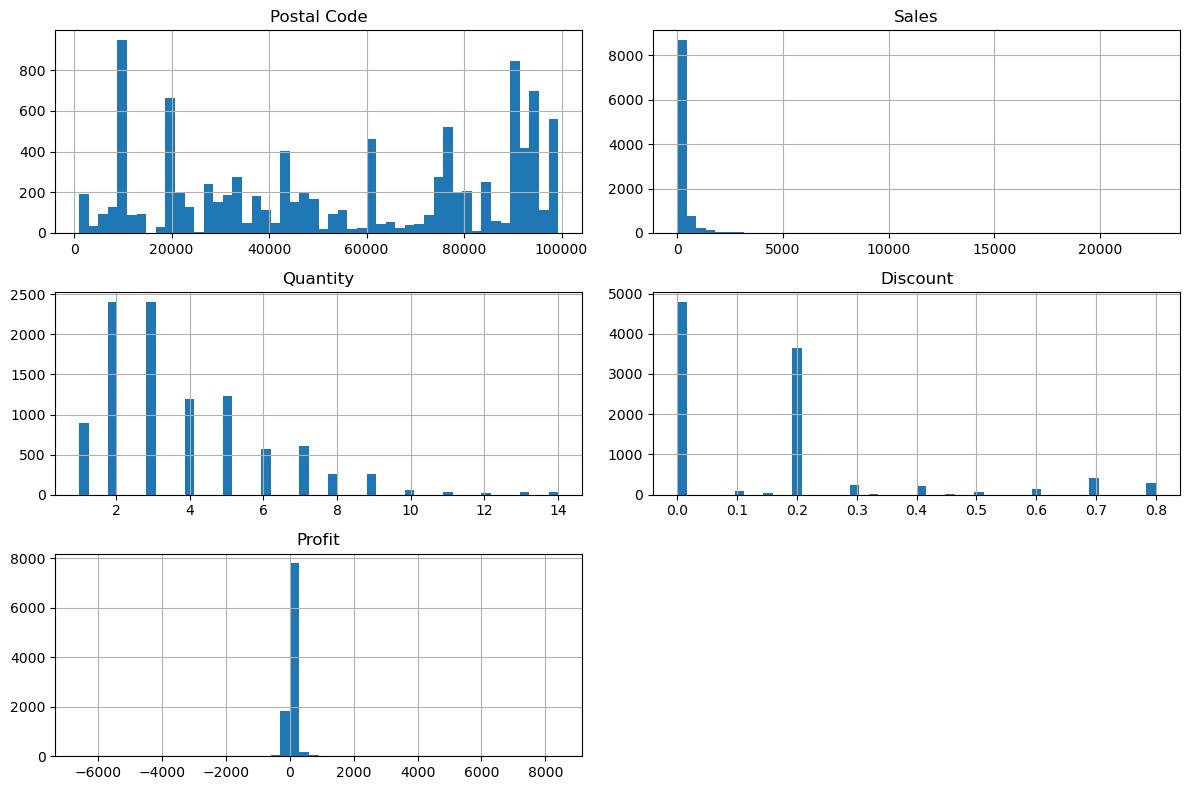

In [8]:
data.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

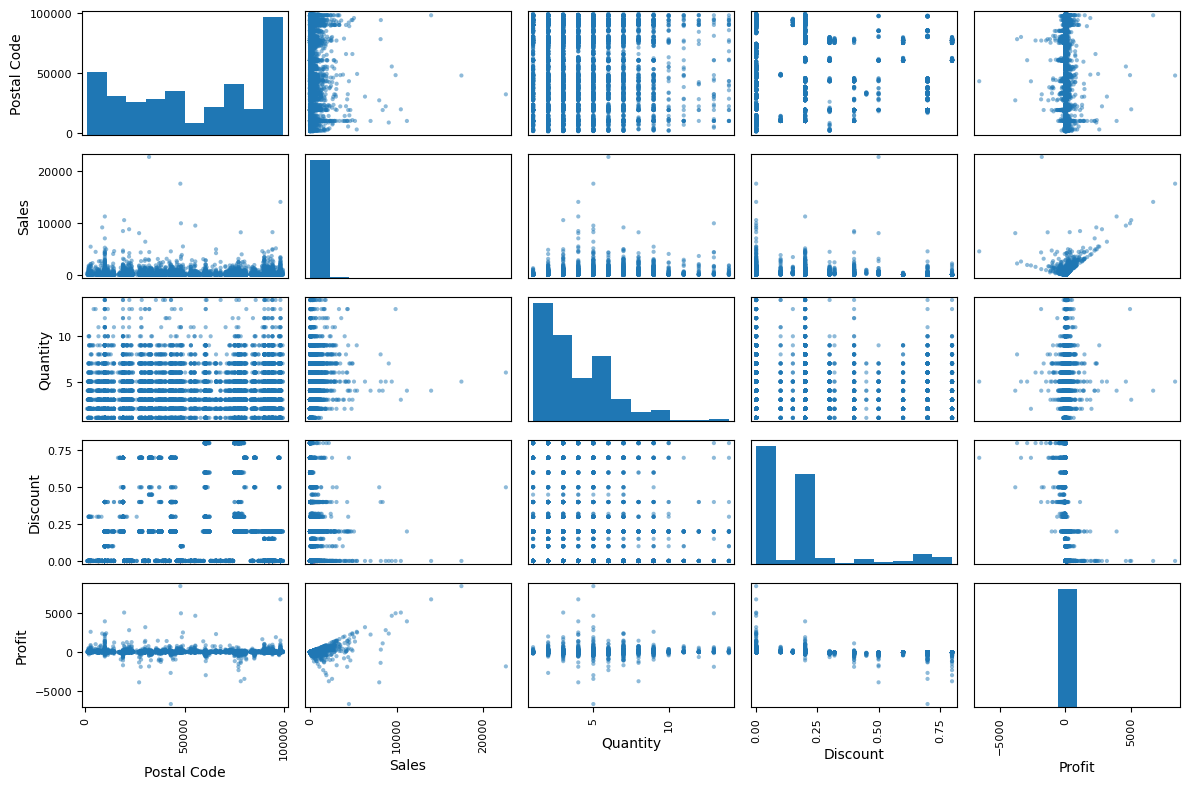

In [9]:
from pandas.plotting import scatter_matrix

attributes = [i for i in data.columns]
scatter_matrix(data[attributes] , figsize=(12,8))
plt.tight_layout()
plt.show()

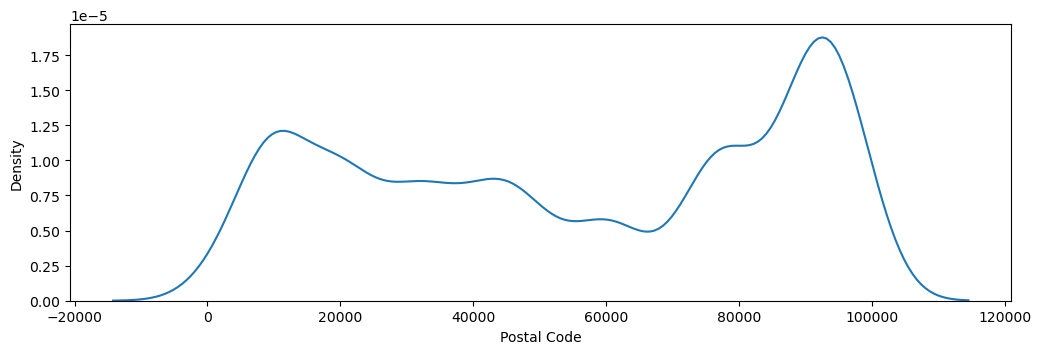

In [10]:
plt.figure(figsize=(20,30))
ax = plt.subplot(9, 2,1)
sn.kdeplot(data['Postal Code'], ax=ax)
plt.tight_layout()
plt.xlabel('Postal Code')

plt.show()

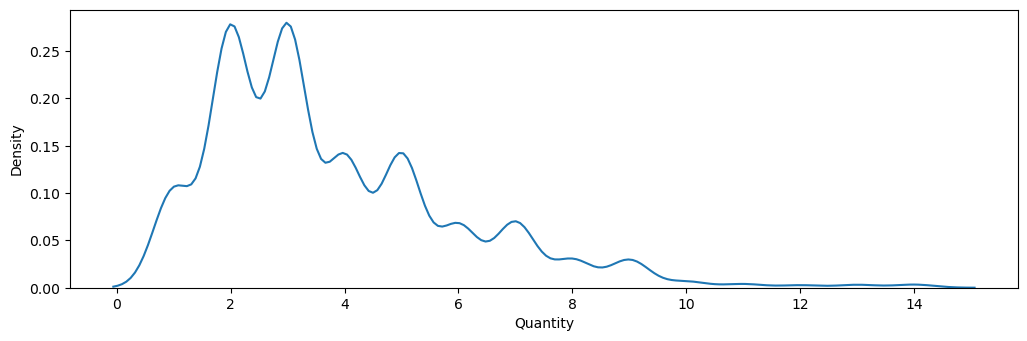

In [11]:
plt.figure(figsize=(20,30))
ax = plt.subplot(9, 2,1)
sn.kdeplot(data['Quantity'], ax=ax)
plt.tight_layout()
plt.xlabel('Quantity')
               
plt.show()

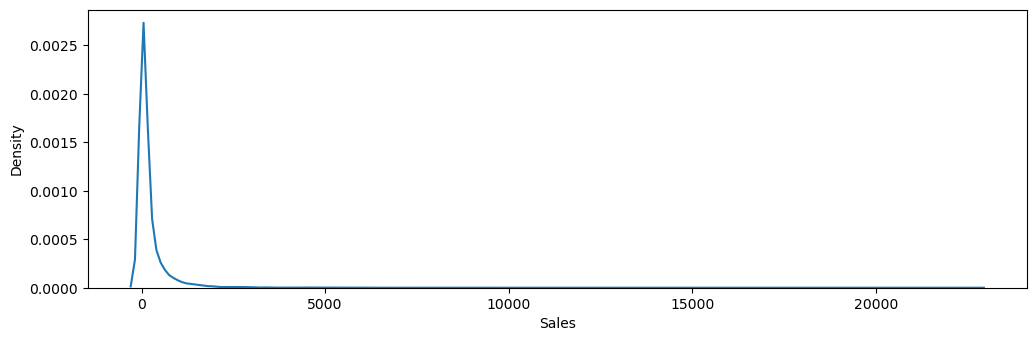

In [12]:
plt.figure(figsize=(20,30))
ax = plt.subplot(9, 2,1)
sn.kdeplot(data['Sales'], ax=ax)
plt.tight_layout()
plt.xlabel('Sales')

plt.show()

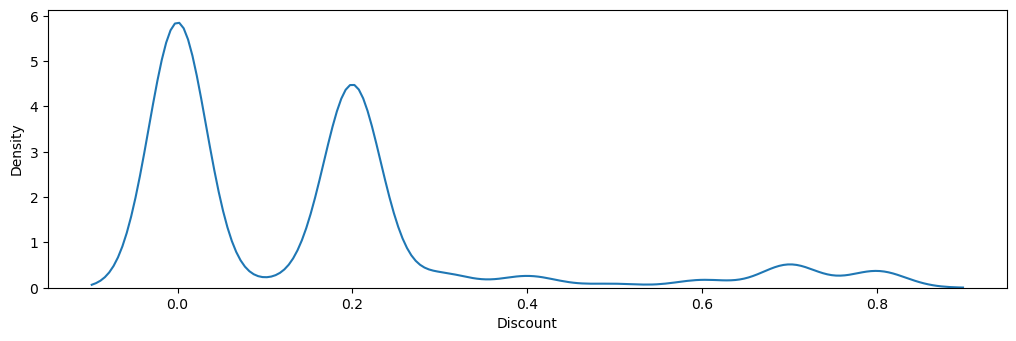

In [13]:
plt.figure(figsize=(20,30))
ax = plt.subplot(9, 2,1)
sn.kdeplot(data['Discount'], ax=ax)
plt.tight_layout()
plt.xlabel('Discount')

plt.show()

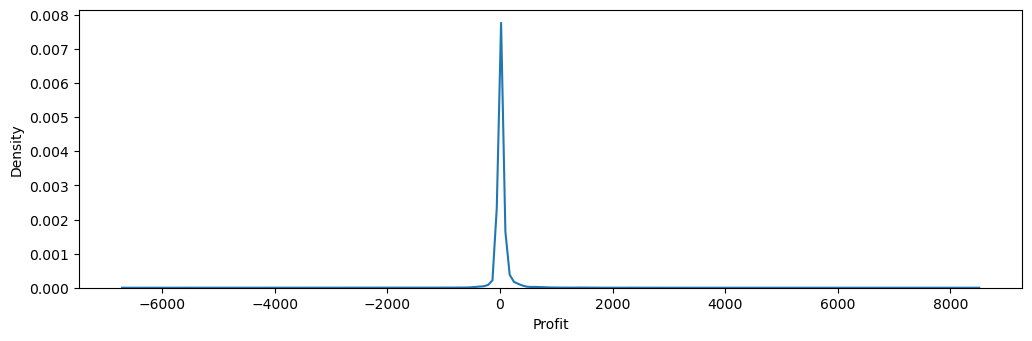

In [14]:
plt.figure(figsize=(20,30))
ax = plt.subplot(9, 2,1)
sn.kdeplot(data['Profit'], ax=ax)
plt.tight_layout()
plt.xlabel('Profit')
               
plt.show()

# **Understanding Categorical variables**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


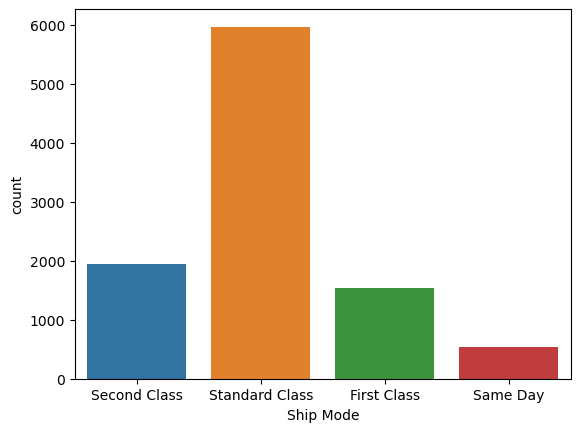

In [16]:
ax = sn.countplot(x='Ship Mode',data=data)

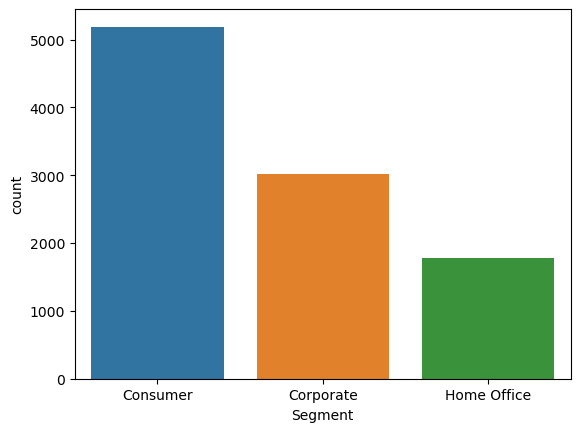

In [17]:
ax = sn.countplot(x='Segment',data=data)

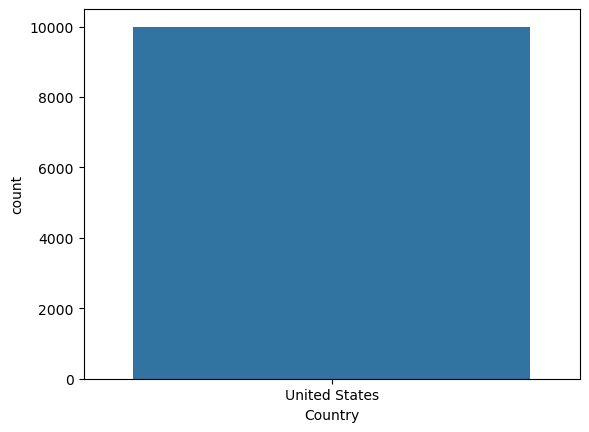

In [18]:
ax = sn.countplot(x='Country',data=data)

In [19]:
data = data.drop(['Country'],axis=1)

In [20]:
#data['City'].value_counts()

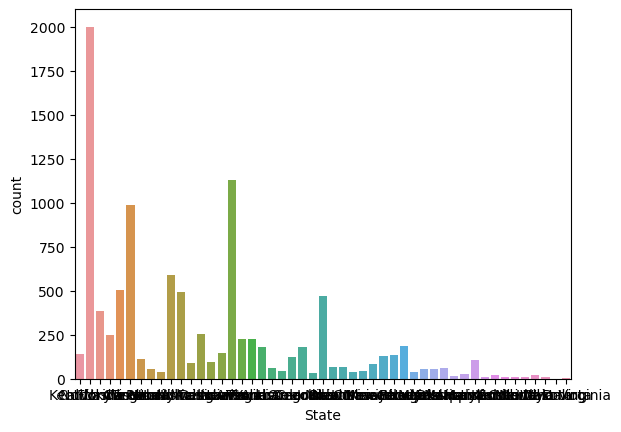

In [21]:
ax = sn.countplot(x='State',data=data)

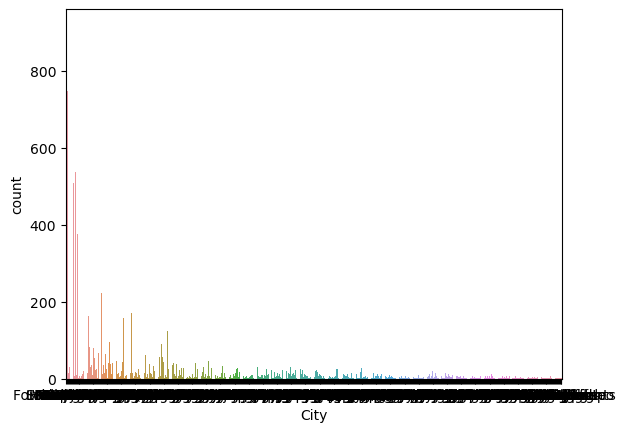

In [22]:
ax = sn.countplot(x='City',data=data)

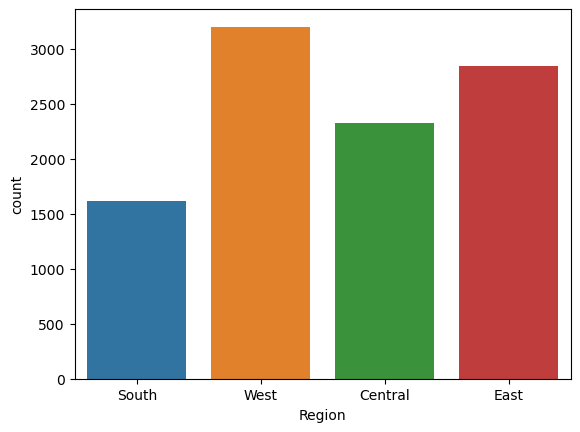

In [23]:
ax = sn.countplot(x='Region',data=data)

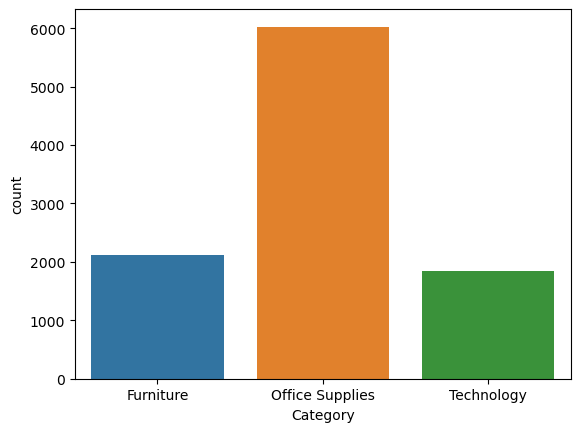

In [24]:
ax = sn.countplot(x='Category',data=data)

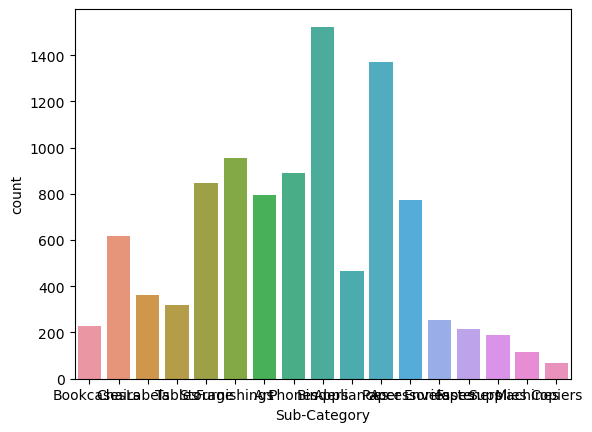

In [25]:
ax = sn.countplot(x='Sub-Category',data=data)

# **Finding the most profitable states**

In [26]:
state_profit=pd.DataFrame(data.groupby("State")["Profit"].sum())
state_profit.reset_index(inplace=True)
state_profit=state_profit.sort_values(by="Profit",ascending=False)
state_profit.head(10)

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


# **Finding the most profitable cities**

In [27]:
cities_profit=pd.DataFrame(data.groupby("City")["Profit"].sum())
cities_profit.reset_index(inplace=True)
cities_profit=cities_profit.sort_values(by="Profit",ascending=False)
cities_profit.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


# **Finding the most profitable sub-categories** 

In [28]:
sub_categories_info=pd.DataFrame(data.groupby("Sub-Category")["Profit"].sum())
sub_categories_info.reset_index(inplace=True)
sub_categories_profit=sub_categories_info.sort_values(by="Profit",ascending=False)
sub_categories_profit.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


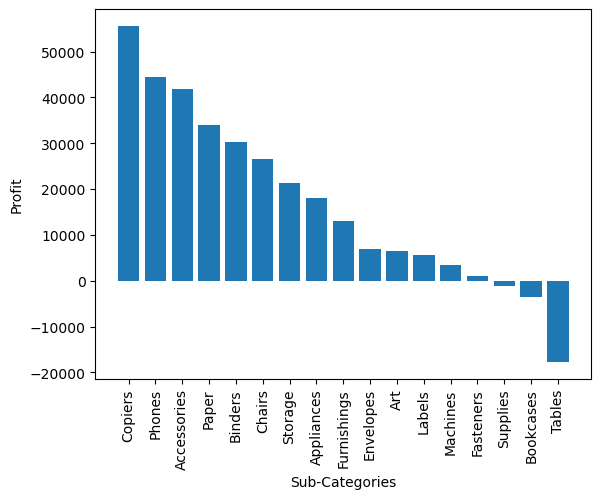

In [29]:
plt.bar(sub_categories_profit["Sub-Category"],sub_categories_profit["Profit"])
plt.xticks(sub_categories_profit['Sub-Category'] , rotation = "vertical")
plt.xlabel("Sub-Categories")
plt.ylabel("Profit")
plt.show()

# **Finding the most profitable categories**

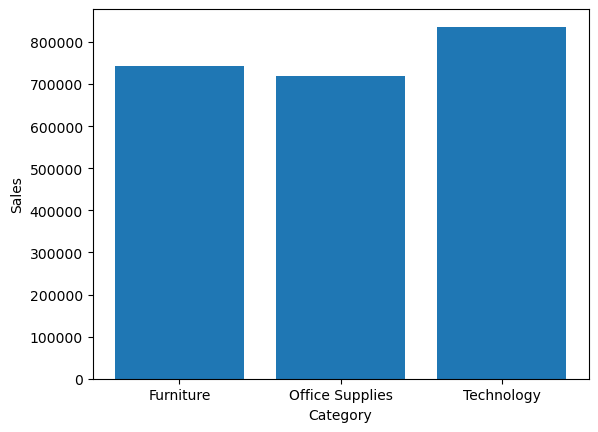

In [30]:
categories_sales=data.groupby("Category").sum()
categories_sales.reset_index(inplace=True)
plt.bar(categories_sales["Category"], categories_sales['Sales'])
plt.xticks(categories_sales.index)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

# **Finding the most popular sub-category**

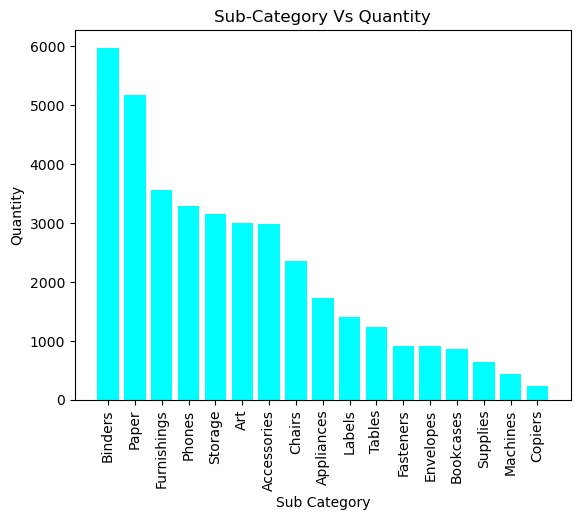

In [31]:
popular_sub_category=pd.DataFrame(data.groupby("Sub-Category")["Quantity"].sum())
popular_sub_category.reset_index(inplace=True)
popular_sub_category=popular_sub_category.sort_values(by="Quantity",ascending=False)
plt.bar(popular_sub_category["Sub-Category"],popular_sub_category["Quantity"],color="cyan")
plt.xticks(popular_sub_category["Sub-Category"],rotation="vertical")
plt.title("Sub-Category Vs Quantity")
plt.xlabel("Sub Category")
plt.ylabel("Quantity")
plt.show()

# **Finding the most profitable customer segment**

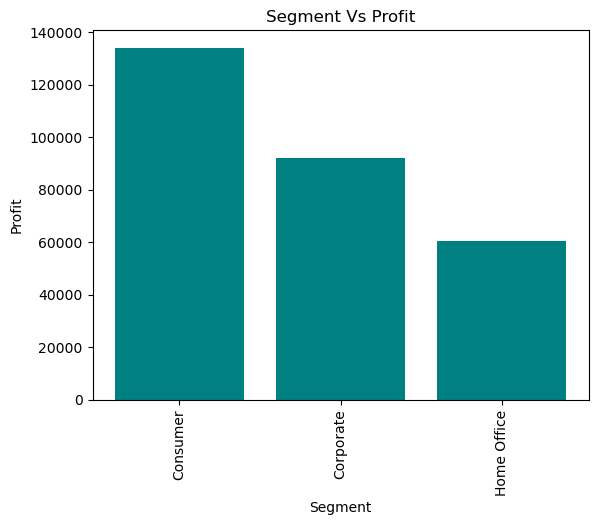

In [32]:
customer_segment=data.groupby("Segment").sum()
customer_segment.reset_index(inplace=True)
plt.bar(customer_segment["Segment"],customer_segment["Profit"],color="teal")
plt.xticks(customer_segment["Segment"],rotation="vertical")
plt.title("Segment Vs Profit")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

# **Finding the most profitable region**

In [33]:
profitable_region=pd.DataFrame(data.groupby("Region")["Profit"].sum())
profitable_region.reset_index(inplace=True)
profitable_region

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


# **Finding the city with the highest sales volume**

In [34]:
city_volume = pd.DataFrame(data.groupby('City')['Sales'].sum())
city_volume =city_volume.sort_values(by="Sales",ascending=False)
city_volume.head()

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


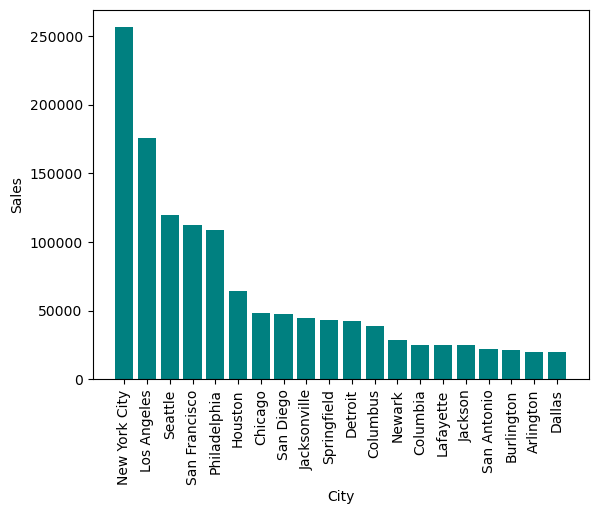

In [35]:
plt.bar(city_volume.index[0:20], city_volume['Sales'][0:20],color="teal")
plt.xticks(city_volume.index[0:20],rotation = 'vertical')
plt.xlabel("City" )
plt.ylabel("Sales")
plt.show()

# **FEATURE ENGINEERING**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


In [37]:
data = data.drop(['Postal Code'],axis=1)

In [38]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [39]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data[['Ship Mode', 'Segment', 'City', 'State', 'Region','Category', 'Sub-Category']] = encoder.fit_transform(data[['Ship Mode', 'Segment', 'City', 'State', 'Region','Category', 'Sub-Category']])

In [40]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2.0,0.0,194.0,15.0,2.0,0.0,4.0,261.9600,2,0.00,41.9136
1,2.0,0.0,194.0,15.0,2.0,0.0,5.0,731.9400,3,0.00,219.5820
2,2.0,1.0,266.0,3.0,3.0,1.0,10.0,14.6200,2,0.00,6.8714
3,3.0,0.0,153.0,8.0,2.0,0.0,16.0,957.5775,5,0.45,-383.0310
4,3.0,0.0,153.0,8.0,2.0,1.0,14.0,22.3680,2,0.20,2.5164


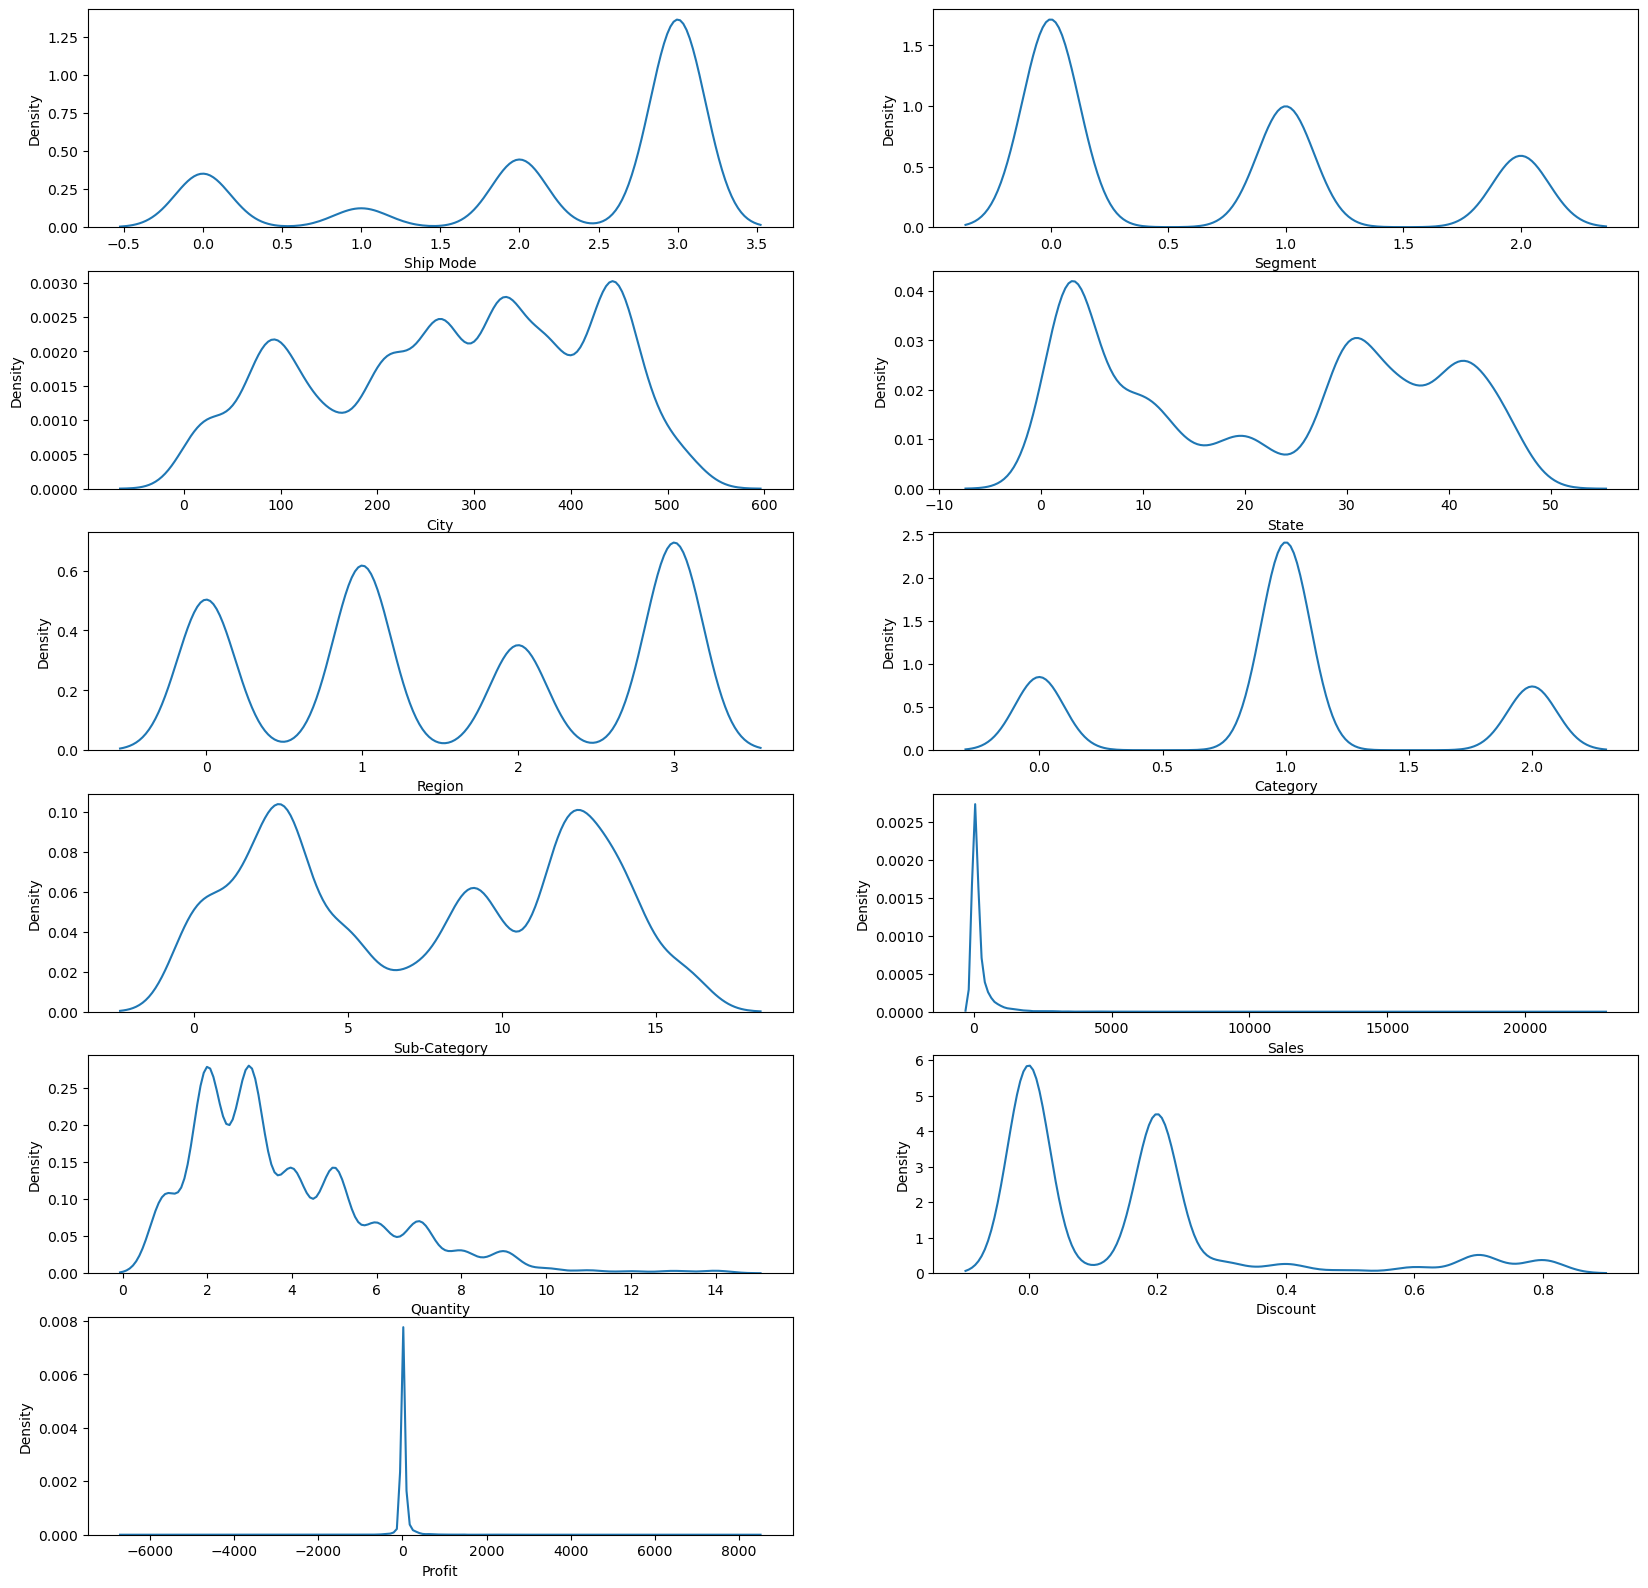

In [41]:
plt.figure(figsize=(20,30))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sn.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

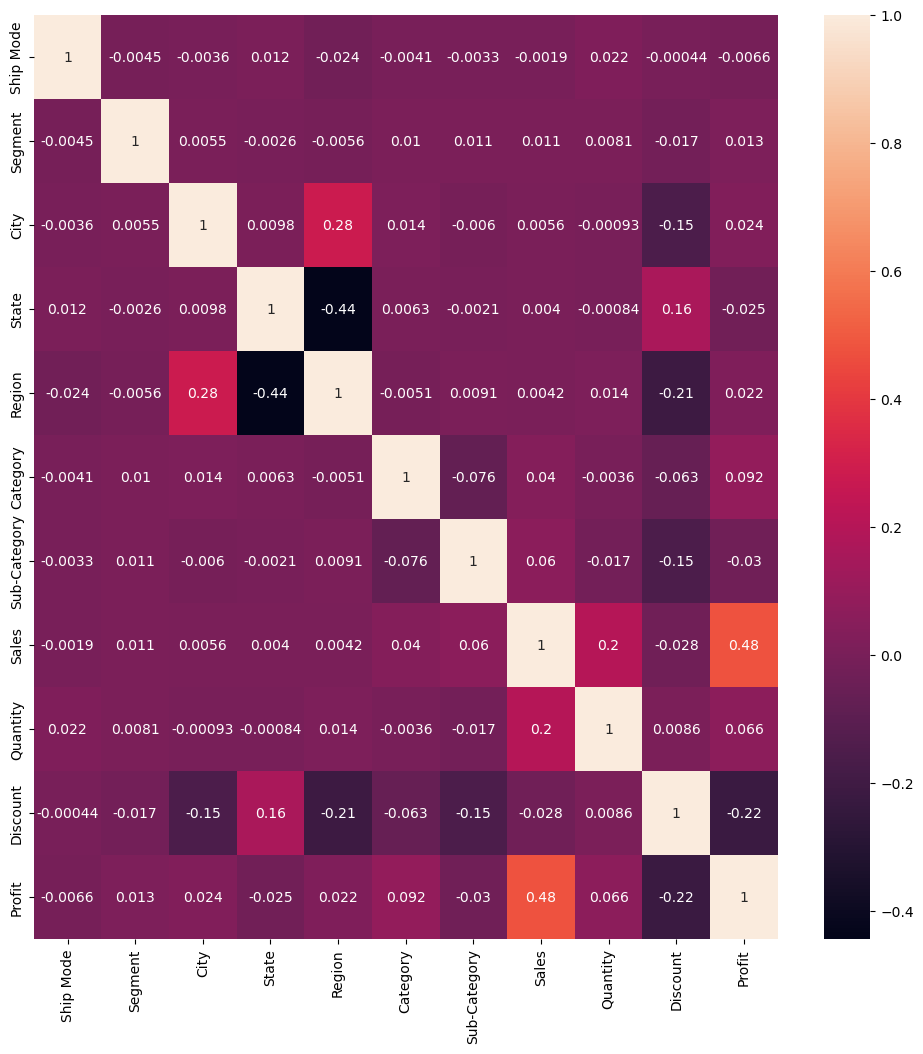

In [42]:
plt.figure(figsize=(12,12))
sn.heatmap(data.corr(), annot=True)
plt.show()

In [43]:
X = data.drop(['Profit'],axis=1)
y = data['Profit']

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_transformed = pca.fit_transform(X)

In [45]:
pca.n_components_

1

In [46]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_transformed , y , test_size=0.20 , random_state=42)

# **Estimation of profit by modelling**

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import TweedieRegressor

reg = TweedieRegressor()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 295.02101189313186 


In [48]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 294.99641009841633 


In [49]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 295.02045026656293 


In [50]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 340.17009758417976 


In [51]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=100, max_depth=10 , random_state=42)
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 356.92509363338894 


In [52]:
from sklearn.ensemble import StackingRegressor

stacking_reg = StackingRegressor(
    estimators = [
        ('Tweedie Regressor ',TweedieRegressor()),
        ('Bayesian Ridge ',BayesianRidge()),
        ('Elastic Net ', ElasticNet())
    ],
    final_estimator = BayesianRidge() , cv = 5
)
stacking_reg.fit(X_train , y_train)


StackingRegressor(cv=5,
                  estimators=[('Tweedie Regressor ', TweedieRegressor()),
                              ('Bayesian Ridge ', BayesianRidge()),
                              ('Elastic Net ', ElasticNet())],
                  final_estimator=BayesianRidge())

In [53]:
y_pred = stacking_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 294.0254139784906 


# **Clustering**

In [54]:
from sklearn.cluster import KMeans

n_clusters=10
inertia=[]
for i in range(1,n_clusters):
    kmeans= KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) 

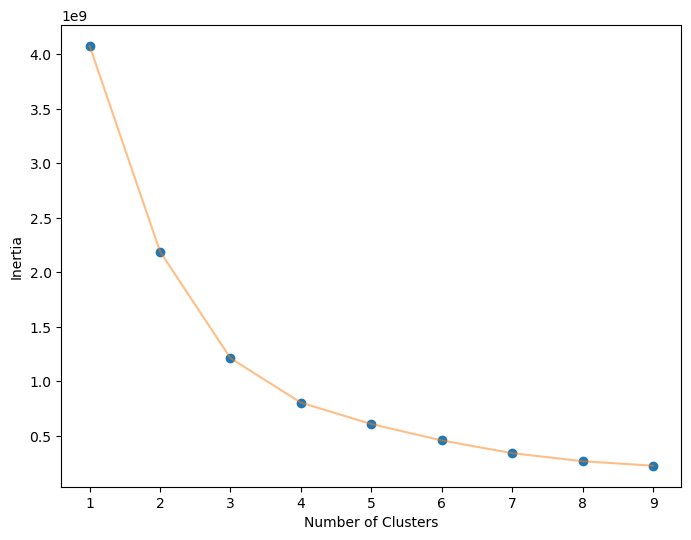

In [55]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , n_clusters) , inertia , 'o')
plt.plot(np.arange(1 , n_clusters) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [56]:
kmeans= KMeans(n_clusters=4,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [57]:
labels=kmeans.labels_
labels

array([3, 0, 3, ..., 3, 3, 3], dtype=int32)

In [58]:
clusters=pd.concat([data, pd.DataFrame({'CLUSTER':labels})], axis=1)
clusters.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,CLUSTER
0,2.0,0.0,194.0,15.0,2.0,0.0,4.0,261.9600,2,0.00,41.9136,3
1,2.0,0.0,194.0,15.0,2.0,0.0,5.0,731.9400,3,0.00,219.5820,0
2,2.0,1.0,266.0,3.0,3.0,1.0,10.0,14.6200,2,0.00,6.8714,3
3,3.0,0.0,153.0,8.0,2.0,0.0,16.0,957.5775,5,0.45,-383.0310,0
4,3.0,0.0,153.0,8.0,2.0,1.0,14.0,22.3680,2,0.20,2.5164,3


In [59]:
clusters['CLUSTER'].unique()

array([3, 0, 1, 2], dtype=int32)

In [60]:
clusters['CLUSTER'].value_counts()

3    8869
0     998
1     114
2      13
Name: CLUSTER, dtype: int64

In [61]:
from sklearn.metrics import silhouette_score
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

Silhouette Coefficient: 0.693
